Download the word vectors from [this link][https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing] and place them in the same folder as your notebook.

In [4]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [1]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format(
    './GoogleNews-vectors-negative300.bin', binary=True)

In [2]:
US = 'United_States'

In [21]:
model[US]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [22]:
model.similarity(US, 'U.S.')

0.73107743

In [23]:
model.most_similar(US)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [25]:
vec = model['Spain'] - model['Madrid'] + model['Athens']
model.similar_by_vector(vec)

[('Athens', 0.7528455257415771),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351787209510803),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615200996399),
 ('Athens_Greece', 0.5034109950065613)]

In [26]:
!wget -nc http://download.tensorflow.org/data/questions-words.txt

--2021-05-18 23:24:33--  http://download.tensorflow.org/data/questions-words.txt
download.tensorflow.org (download.tensorflow.org) をDNSに問いあわせています... 142.250.76.144
download.tensorflow.org (download.tensorflow.org)|142.250.76.144|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 603955 (590K) [text/plain]
`questions-words.txt' に保存中

questions-words.txt 100%[===================>] 589.80K  --.-KB/s 時間 0.02s    

2021-05-18 23:24:34 (32.0 MB/s) - `questions-words.txt' へ保存完了 [603955/603955]



In [37]:
import numpy as np

section = ""
with open('questions-words.txt', mode='r') as f1, open('answer-words.txt', mode='w')as f2:
    for line in f1:
        if line.startswith(': '):
            section = line.lstrip(': ').strip()
        else:
            try:
                a, b, c, expected = [word for word in line.split()]
            except:
                print('skipping invalid line')
                continue
            sim, cos = model.most_similar(
                positive=[b, c], negative=[a], topn=1)[0]
            f2.write(' '.join(
                [section, a, b, c, expected, sim, str(cos) + '\n'])
            )
            

In [5]:
count = {'sem': 0, 'syn': 0}
correct = {'sem': 0, 'syn': 0}
key = ''

with open('answer-words.txt', mode='r') as f:
    for line in f:
        try:
            section, a, b, c, expected, predicted, cos = [
                word for word in line.split()
            ]
        except:
            print('skipping invalid line')
            continue
        if section.startswith('gram'):
            key = 'syn'
        else:
            key = 'sem'
        if expected == predicted:
            correct[key] += 1
        count[key] += 1

print('Semantic accuracy:', correct['sem'] / count['sem'])
print('Syntastic accuracy:', correct['syn'] / count['sem'])


Semantic accuracy: 0.7308602999210734
Syntastic accuracy: 0.8907430375465103


In [6]:
!wget -nc http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip -n wordsim353.zip

--2021-05-19 23:17:46--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
www.gabrilovich.com (www.gabrilovich.com) をDNSに問いあわせています... 208.97.177.37
www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 23257 (23K) [application/zip]
`wordsim353.zip' に保存中

wordsim353.zip      100%[===================>]  22.71K   135KB/s 時間 0.2s     

2021-05-19 23:17:46 (135 KB/s) - `wordsim353.zip' へ保存完了 [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [17]:
import pandas as pd
df = pd.read_csv('combined.csv')
df['similarity'] = df.apply(lambda x: model.similarity(x.at['Word 1'], x.at['Word 2']), axis=1)

In [19]:
df[['Human (mean)', 'similarity']].corr(method='spearman')

,Human (mean),similarity
Human (mean),1.000000,0.700017
similarity,0.700017,1.000000


In [33]:
countries = set()
with open('./answer-words.txt') as f:
  for line in f:
    section, a, b, c, expected, predicted, cos = line.split()
    if section in ['capital-common-countries', 'capital-world']:
      countries.add(b)
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(a)

countries = list(countries)
countries_vec = [model[country] for country in countries]

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(countries_vec)

In [34]:
import numpy as np

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))


cluster 0
Rwanda, Botswana, Mozambique, Gambia, Angola, Burundi, Senegal, Uganda, Zimbabwe, Nigeria, Gabon, Liberia, Malawi, Zambia, Guinea, Ghana, Niger, Madagascar, Namibia, Mali, Kenya
cluster 1
Iran, Lebanon, Iraq, Morocco, Qatar, Syria, Jordan, Sudan, Tunisia, Oman, Pakistan, Egypt, Bahrain, Afghanistan, Eritrea, Mauritania, Libya, Algeria, Somalia
cluster 2
Hungary, Slovakia, Ukraine, Estonia, Serbia, Macedonia, Slovenia, Tajikistan, Romania, Latvia, Armenia, Azerbaijan, Montenegro, Bulgaria, Albania, Kyrgyzstan, Lithuania, Turkmenistan, Turkey, Kazakhstan, Belarus, Georgia, Moldova, Greece, Uzbekistan, Croatia, Cyprus, Poland, Russia
cluster 3
Sweden, Canada, France, Uruguay, Denmark, Norway, Liechtenstein, Germany, Switzerland, England, Australia, Greenland, Ireland, Finland, Japan, Austria, Malta, Italy, Spain, Portugal, Belgium
cluster 4
Nepal, Taiwan, Laos, Venezuela, Vietnam, Fiji, Peru, Ecuador, Guyana, Indonesia, Dominica, China, Thailand, Samoa, Bahamas, Jamaica, Bhutan,

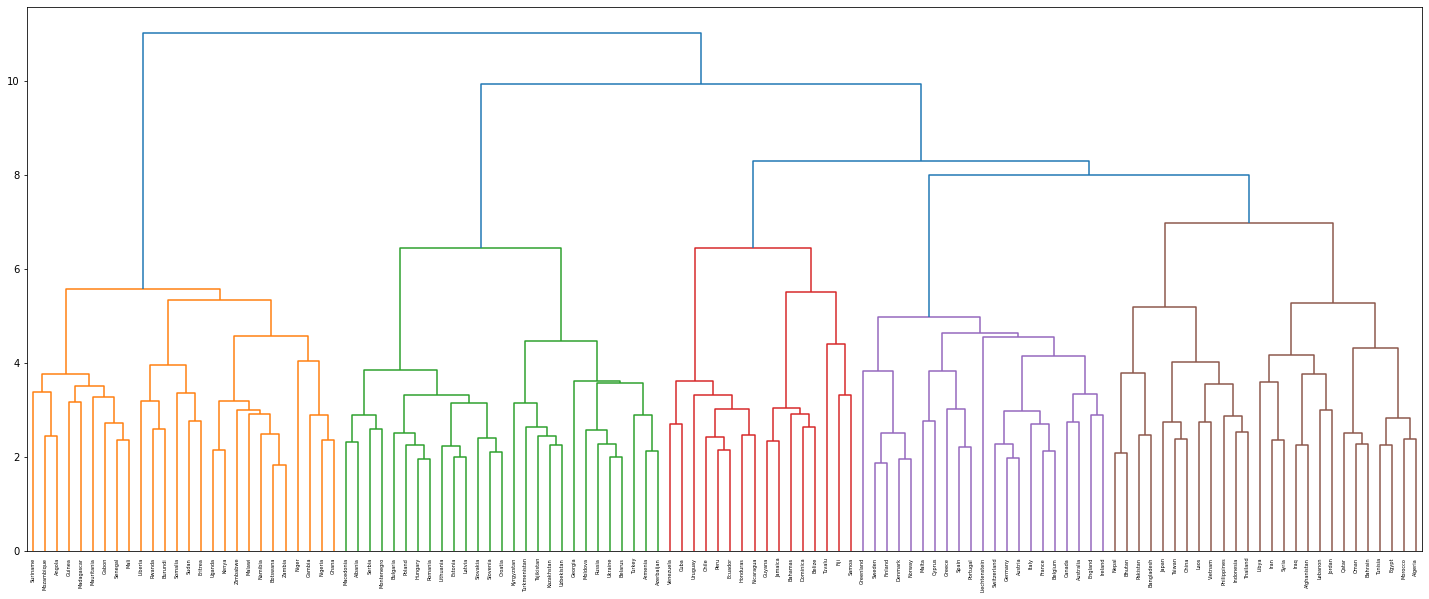

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(countries_vec, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=countries)

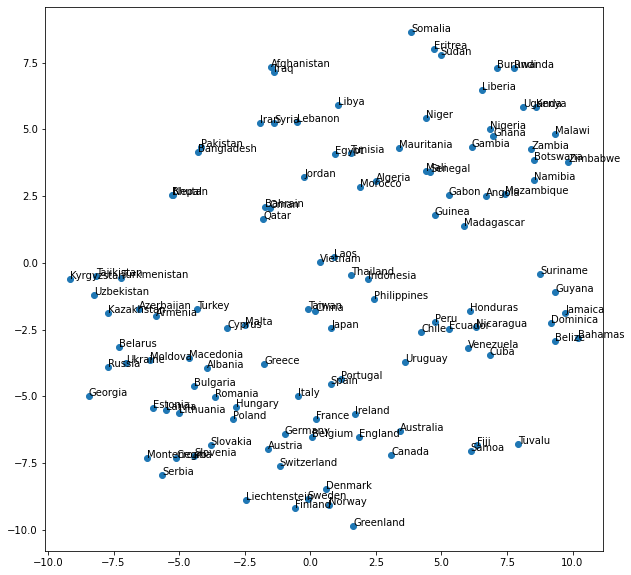

In [39]:
from sklearn.manifold import TSNE

embedded = TSNE(n_components=2).fit_transform(countries_vec)

fig = plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()